In [1]:
from tensorflow import keras
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [5]:
model = keras.models.load_model(r'..\CNN-LSTM\model.h5')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed (TimeDistr  (None, 1, 98, 64)        256       
 ibuted)                                                         
                                                                 
 time_distributed_1 (TimeDis  (None, 1, 49, 64)        0         
 tributed)                                                       
                                                                 
 time_distributed_2 (TimeDis  (None, 1, 47, 128)       24704     
 tributed)                                                       
                                                                 
 time_distributed_3 (TimeDis  (None, 1, 23, 128)       0         
 tributed)                                                       
                                                                 
 time_distributed_4 (TimeDis  (None, 1, 21, 64)        2

In [ ]:
hpg = pd.read_csv(r'..\data\HPG.csv')
hpg.info()

In [3]:
hpg = pd.read_csv(r'..\data\HPG.csv')
hpg.head()
hpg2 = hpg.drop('date', axis=1)

print(hpg2)

X = []
Y = []
window_size=100
for i in range(1 , len(hpg2) - window_size -1 , 1):
    first = hpg2.iloc[i,2]
    temp = []
    temp2 = []
    for j in range(window_size):
        temp.append((hpg2.iloc[i + j, 2] - first) / first)
    temp2.append((hpg2.iloc[i + window_size, 2] - first) / first)
    X.append(np.array(temp).reshape(100, 1))
    Y.append(np.array(temp2).reshape(1, 1))

X = np.array(X)

X = X.reshape(X.shape[0],1,100,1)

       high    low   open  close  adjust    volume symbol
0     61.00  60.00  60.00   61.0    1.97    653120    HPG
1     64.00  61.00  64.00   64.0    2.06   1203080    HPG
2     66.00  63.00  63.50   66.0    2.13   1771660    HPG
3     69.00  66.00  67.00   68.0    2.19   1535800    HPG
4     69.50  65.00  69.50   65.0    2.10    909010    HPG
...     ...    ...    ...    ...     ...       ...    ...
2988  46.60  45.55  46.55   45.9   34.74  12180400    HPG
2989  46.70  45.60  45.90   45.8   34.66  13456300    HPG
2990  46.30  45.50  45.80   45.8   34.66  17659745    HPG
2991  46.30  45.70  46.30   45.7   34.59  11755870    HPG
2992  46.65  45.85  46.00   46.4   35.12  15133250    HPG

[2993 rows x 7 columns]


In [ ]:
X.shape

In [ ]:
def reshape(df):
    X = []
    window_size=100
    for i in range(1 , len(df) - window_size -1 , 1):
        first = df.iloc[i,2]
        temp = []
        for j in range(window_size):
            temp.append((df.iloc[i + j, 2] - first) / first)
        X.append(np.array(temp).reshape(100, 1))
    X = np.array(X)
    X = X.reshape(X.shape[0],1,100,1)
    return X

In [ ]:
hpg = reshape(hpg)

91/91 [==============================] - 0s 5ms/step


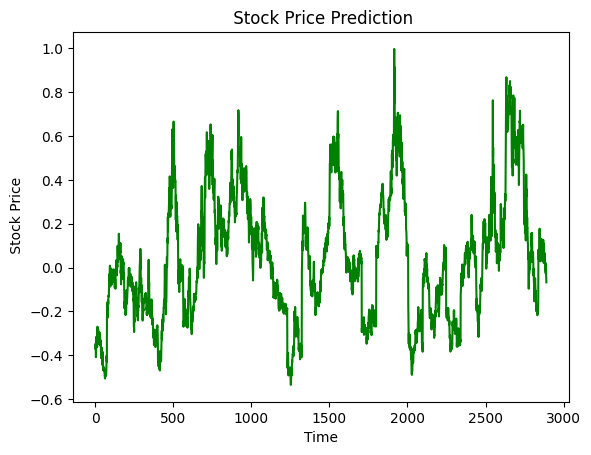

In [7]:
hpg_pred = model.predict(X)
hpg_pred = np.array(hpg_pred[:,0]).reshape(-1,1)
plt.plot(hpg_pred, color = 'green', label = 'Predicted  Stock Price')
plt.title(' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.show()

In [13]:
hpg_pred

array([[-0.37045115],
       [-0.34744078],
       [-0.37560248],
       ...,
       [-0.00662394],
       [-0.02774917],
       [-0.06754799]], dtype=float32)